In [3]:
import numpy as np
np.set_printoptions(precision=2, suppress=True) # display 2 d.p.
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
data[:10].view()  # view the first 10 records

array([[  562.  ,     5.88,     5.92,     0.03],
       [ 2541.  ,     5.53,     7.  ,     1.47],
       [ 2542.  ,     6.32,     5.83,    -0.49],
       [ 2571.  ,     6.03,     5.83,    -0.19],
       [ 2572.  ,     6.4 ,     7.33,     0.93],
       [ 4111.  ,     7.45,     6.83,    -0.61],
       [ 4162.  ,     6.57,     5.72,    -0.85],
       [ 4881.  ,     6.12,     4.97,    -1.15],
       [ 4882.  ,     6.96,     5.95,    -1.01],
       [ 4981.  ,     6.12,     5.92,    -0.21]])

In [4]:
d = data[:,1:3]
def split_cost(params, array=data[:,1:3]): # array = [actHrs, psqiHrs], params = [lo, hi]
    
    x = array[~np.isnan(array[:,0]),0] # remove NaNs from array for readability
    y = array[~np.isnan(array[:,1]),1]
    lo = params[0]
    hi = params[1]
    
    # Enforce restrictions to ensure some membership in each division
    if lo < max(x.min(), y.min()):
        lo = max(x.min(), y.min())
    
    if hi > min(x.max(), y.max()):
        hi = min(x.max(), y.max())
    
    loErr = abs(sum(x <= lo) - sum(y <= lo))
    hiErr = abs(sum(x >= hi) - sum(y >= hi))
    sumErr = loErr + hiErr
    return sumErr

split_cost([4,7])

2

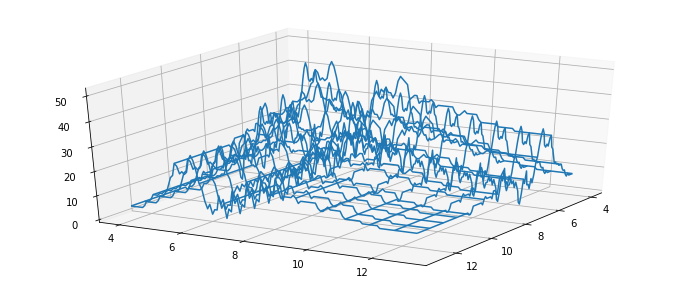

In [5]:
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation
%matplotlib inline

x = np.linspace(4,13,num=120)
y = np.linspace(4,13,num=120)

Z = np.empty([len(x),len(y)])
                    
for row,i in enumerate(x):
    for col,j in enumerate(y):
        params = [i,j]
        Z[row,col] = split_cost(params)
        
X = np.tile(x,(120,1))
Y = np.tile(y,(120,1))
Y = Y.T

fig = pl.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.view_init(30,30)

In [6]:
class GD(): 
    def __init__(self, eta=0.1, x0=[8,8], max_iter=50, diff_to_stop=0.01, delta=0.01): 
        self.x0 = np.asarray(x0) #randomly initialize any value
        self.delta = delta #used for gradient calculations
        self.eta = eta #learning rate 
        self.diff_to_stop = diff_to_stop #stop if steps are smaller than this
        self.max_iter = max_iter #when to stop

    def run(self, f):        
        x_new = self.x0
        iter_no = 0
        pl.figure(figsize=(5, 5))
        
        # add feature scaling between 0 and 1 
        
        while True:
            iter_no += 1
            
            # main algorithm
            x = x_new # note: x_new is the position of the previous move
            grad = np.zeros_like(x)
            for i in range(len(x)):
                x_delta = np.copy(x)
                x_delta[i] = x_delta[i] + self.delta
                grad[i] = ((f(x_delta) - f(x))/self.delta)*x[i]
                
            x_new = x - self.eta*grad # move in the direction of the gradient
            # end of main
            
            # plot cost function
            pl.scatter(iter_no, f(x), color='r')
            pl.scatter(iter_no, grad[0], color='b')
            pl.scatter(iter_no, grad[1], color='k')
            
            # test for convergence:
            step_size = np.abs(x_new-x)
            if (step_size < self.diff_to_stop).all():
                print('Successfully converged. Final cost = {} after {} iterations'.format(f(x), iter_no))
                return x, f(x)
            elif iter_no == self.max_iter:
                print('Max iterations reached. Convergence not guaranteed. Grad={}'.format(grad))
                return x, f(x)

Successfully converged. Final cost = 0.230533211944743 after 62 iterations


(array([ 1.22,  1.7 ]), 0.23053321194474299)

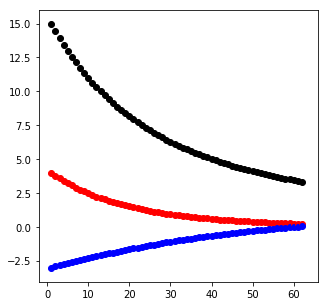

In [7]:
def f(x):
    return (x[0]-x[1])**2

#GD(eta=0.0005, x0=[0,8], max_iter=100, diff_to_stop=0.001, delta=0.5).run(split_cost)
GD(eta=0.003, x0=[1,3], max_iter=100, diff_to_stop=0.01, delta=1).run(f)